# South Korea COVID-19 Data

In [20]:
import os
import sys

from IPython.display import IFrame
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.patches as patches
import warnings
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors

import urllib
import zipfile
import glob

# Importing the South Korea data (excel) in the Data directory

In [21]:
kor_cov19_df = pd.read_excel('Data/input/covid_19_south_korea_full_xls.xlsx',
                            sheet_name='covid_19_daily_country',
                            # dtype={'Confirm_New':int, 'Death_New':int, 'Death_Tot':int, 
                            #       'Test_New':int, 'Test_Tot':int, 'Test_Curr':int}
                            )

kor_cov19_df.fillna(0, inplace=True)

In [22]:
kor_cov19_df

,Date,Country,Confirm_New,Confirm_Tot,Death_New,Death_Tot,Test_New,Test_Tot,Test_Curr
0,2020-01-20,South Korea,1.0,1,0.0,0.0,0.0,4.0,0.0
1,2020-01-24,South Korea,1.0,2,0.0,0.0,23.0,27.0,0.0
2,2020-01-26,South Korea,1.0,3,0.0,0.0,24.0,51.0,1.0
3,2020-01-27,South Korea,1.0,4,0.0,0.0,10.0,61.0,1.0
4,2020-01-28,South Korea,0.0,4,0.0,0.0,55.0,116.0,15.0
...,...,...,...,...,...,...,...,...,...
95,2020-04-28,South Korea,9.0,10761,2.0,246.0,5683.0,614197.0,8307.0
96,2020-04-29,South Korea,4.0,10765,1.0,247.0,5684.0,619881.0,8634.0
97,2020-04-30,South Korea,9.0,10774,1.0,248.0,3188.0,623069.0,8685.0
98,2020-05-01,South Korea,6.0,10780,2.0,250.0,4493.0,627562.0,8496.0


In [23]:
kor_cov19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         100 non-null    datetime64[ns]
 1   Country      100 non-null    object        
 2   Confirm_New  100 non-null    float64       
 3   Confirm_Tot  100 non-null    int64         
 4   Death_New    100 non-null    float64       
 5   Death_Tot    100 non-null    float64       
 6   Test_New     100 non-null    float64       
 7   Test_Tot     100 non-null    float64       
 8   Test_Curr    100 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 7.2+ KB


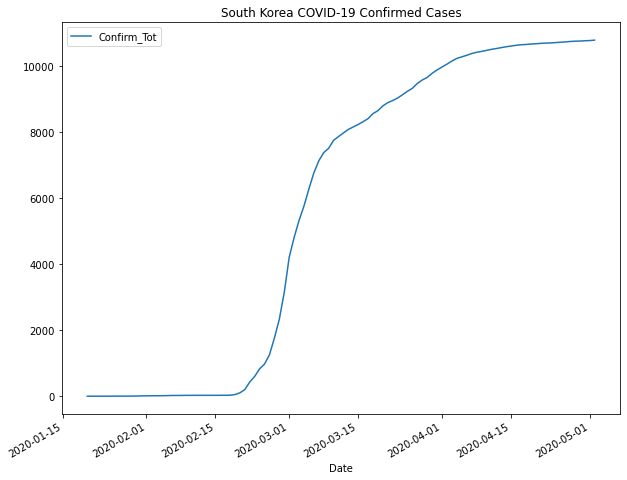

In [24]:
kor_cov19_df.plot(x='Date', 
                  y='Confirm_Tot',
                  kind='line',
                  title='South Korea COVID-19 Confirmed Cases',
                  figsize=(10, 8)
                 );

In [25]:
kor_cov19_confirm_tot = kor_cov19_df[['Date', 'Confirm_Tot']]

kor_cov19_confirm_tot

,Date,Confirm_Tot
0,2020-01-20,1
1,2020-01-24,2
2,2020-01-26,3
3,2020-01-27,4
4,2020-01-28,4
...,...,...
95,2020-04-28,10761
96,2020-04-29,10765
97,2020-04-30,10774
98,2020-05-01,10780


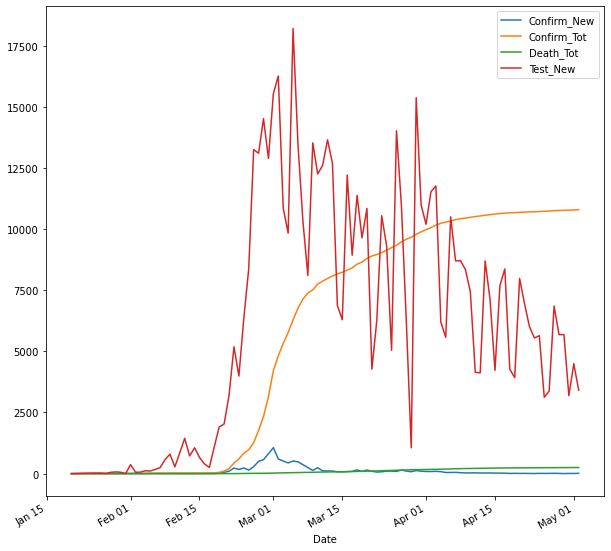

In [36]:
import matplotlib.dates as mdates

kor_cov19_confirm_tot = kor_cov19_df[['Date', 'Confirm_New', 'Confirm_Tot', 'Death_Tot', 'Test_New']]
kor_cov19_confirm_tot.set_index('Date', inplace=True)

# plot data
fig, ax = plt.subplots(figsize=(10, 10))
kor_cov19_confirm_tot.plot(ax=ax)

#set ticks every month
#ax.xaxis.set_major_locator(mdates.MonthLocator())

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [ ]:
kor_cov19_confirm_tot = kor_cov19_df[['Date', 'Con', 'Confirm_Tot', 'Test_New']]
kor_cov19_confirm_tot.set_index('Date', inplace=True)

# plot data
fig, ax = plt.subplots(figsize=(10, 10))
kor_cov19_confirm_tot.plot(
    ax=ax
)

#set ticks every month
#ax.xaxis.set_major_locator(mdates.MonthLocator())

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [ ]:
# # import matplotlib.ticker as mticker

# ax = kor_cov19_df['Confirm_Tot'].plot(kind='line', x=kor_cov19_df['Date'], stacked=True)

# # Make most of the ticklabels empty so the labels don't get too crowded
# ticklabels = ['']*len(kor_cov19_df.index)
# # Every 10th ticklable shows the month and day
# ticklabels[::10] = [item.strftime('%b %d') for item in kor_cov19_df['Date'].index[::10]]
# # Every 12th ticklabel includes the year
# # ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in df_ts.index[::12]]
# ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
# plt.gcf().autofmt_xdate()

# plt.show()

In [99]:
kor_cov19_df

,Date,Country,Confirm_New,Confirm_Tot,Death_New,Death_Tot,Test_New,Test_Tot,Test_Curr
0,2020-01-20,South Korea,1.0,1,0.0,0.0,0.0,4.0,0.0
1,2020-01-24,South Korea,1.0,2,0.0,0.0,23.0,27.0,0.0
2,2020-01-26,South Korea,1.0,3,0.0,0.0,24.0,51.0,1.0
3,2020-01-27,South Korea,1.0,4,0.0,0.0,10.0,61.0,1.0
4,2020-01-28,South Korea,0.0,4,0.0,0.0,55.0,116.0,15.0
...,...,...,...,...,...,...,...,...,...
95,2020-04-28,South Korea,9.0,10761,2.0,246.0,5683.0,614197.0,8307.0
96,2020-04-29,South Korea,4.0,10765,1.0,247.0,5684.0,619881.0,8634.0
97,2020-04-30,South Korea,9.0,10774,1.0,248.0,3188.0,623069.0,8685.0
98,2020-05-01,South Korea,6.0,10780,2.0,250.0,4493.0,627562.0,8496.0


# Importing the South Korea Province data (excel) in the Data directory

In [37]:
kor_cov19_province_df = pd.read_excel('Data/input/covid_19_south_korea_full_xls.xlsx',
                                  sheet_name='covid_19_daily_province')

kor_cov19_province_df

,Date,Province,Confirm_New,Confirm_Tot,Confirm_Acc,Death_New,Death_Tot,Test_New,Test_Tot,Test_Curr
0,2020-01-20 00:00:00,Incheon,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-24 00:00:00,Seoul,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-26 00:00:00,Gyeonggi-do,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-27 00:00:00,Gyeonggi-do,1.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-30 00:00:00,Seoul,3.0,4.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
677,2020-05-01 00:00:00,Airport,3.0,NaN,10778.0,NaN,NaN,NaN,NaN,NaN
678,2020-05-02 00:00:00,Seoul,2.0,NaN,10779.0,NaN,NaN,NaN,NaN,NaN
679,2020-05-02 00:00:00,Daegu,4.0,NaN,10780.0,NaN,NaN,NaN,NaN,NaN
680,2020-05-02 00:00:00,Gyeonggi-do,2.0,NaN,10781.0,NaN,NaN,NaN,NaN,NaN


In [38]:
kor_cov19_province_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         682 non-null    object 
 1   Province     682 non-null    object 
 2   Confirm_New  663 non-null    float64
 3   Confirm_Tot  84 non-null     float64
 4   Confirm_Acc  672 non-null    float64
 5   Death_New    105 non-null    float64
 6   Death_Tot    105 non-null    float64
 7   Test_New     48 non-null     float64
 8   Test_Tot     65 non-null     object 
 9   Test_Curr    66 non-null     float64
dtypes: float64(7), object(3)
memory usage: 53.4+ KB


In [41]:
kor_cov19_province_df['Date']=pd.to_datetime(kor_cov19_province_df['Date'])
# kor_cov19_province_df['Date'].apply(pd.to_datetime) didn't work

In [42]:
kor_cov19_province_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         682 non-null    datetime64[ns]
 1   Province     682 non-null    object        
 2   Confirm_New  663 non-null    float64       
 3   Confirm_Tot  84 non-null     float64       
 4   Confirm_Acc  672 non-null    float64       
 5   Death_New    105 non-null    float64       
 6   Death_Tot    105 non-null    float64       
 7   Test_New     48 non-null     float64       
 8   Test_Tot     65 non-null     object        
 9   Test_Curr    66 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 53.4+ KB


In [43]:
kor_cov19_province_df.fillna(0)

,Date,Province,Confirm_New,Confirm_Tot,Confirm_Acc,Death_New,Death_Tot,Test_New,Test_Tot,Test_Curr
0,2020-01-20,Incheon,1.0,1.0,1.0,0.0,0.0,0.0,0,0.0
1,2020-01-24,Seoul,1.0,1.0,2.0,0.0,0.0,0.0,0,0.0
2,2020-01-26,Gyeonggi-do,1.0,1.0,3.0,0.0,0.0,0.0,0,0.0
3,2020-01-27,Gyeonggi-do,1.0,2.0,4.0,0.0,0.0,0.0,0,0.0
4,2020-01-30,Seoul,3.0,4.0,7.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
677,2020-05-01,Airport,3.0,0.0,10778.0,0.0,0.0,0.0,0,0.0
678,2020-05-02,Seoul,2.0,0.0,10779.0,0.0,0.0,0.0,0,0.0
679,2020-05-02,Daegu,4.0,0.0,10780.0,0.0,0.0,0.0,0,0.0
680,2020-05-02,Gyeonggi-do,2.0,0.0,10781.0,0.0,0.0,0.0,0,0.0


# Now let's merge it with South Korea Geodata